In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

import scipy

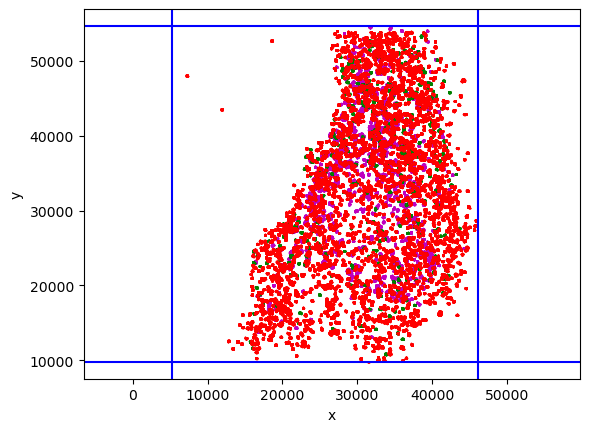

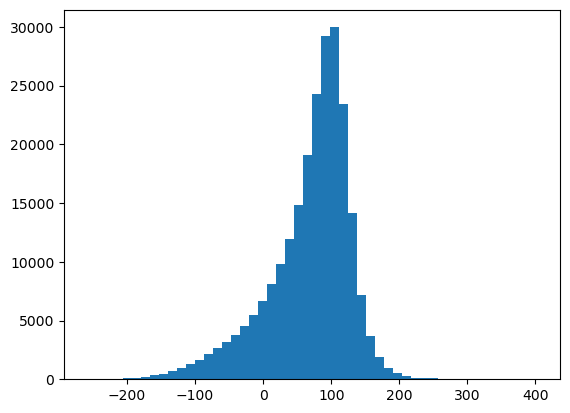

In [2]:
#____________________Load files__________________________________

File_number = 13*1

groups_sep = [0]*3

PixelSize = 108 # in nanometer
max_value = 200 # that is the cut of valule for the distance calcuations only neigbors closer as this value are taken into account


#############---BrefeldinA

file_path = [0] * File_number



###---BrefeldinA #############---#############---#############---#############---#############---
file_normal1 = r'H:\09.Adapter_PAINT\GolgiPlex\z.Drugs\BrefeldinA\231029_BrefeldinA\231029'
drug= 'BrefeldinA'
date='231029'



file_path[0] = file_normal1   +  r'_r1_GM130.hdf5'
file_path[1] = file_normal1   +  r'_r2_Giantin.hdf5'
file_path[2] = file_normal1   +  r'_r3_Golgin97.hdf5'
file_path[3] = file_normal1   +  r'_r4_TGN46.hdf5'
file_path[4] = file_normal1   +  r'_r5_ERGIC53.hdf5'
file_path[5] = file_normal1   +  r'_r6_Grasp65.hdf5'
file_path[6] = file_normal1   +  r'_r7_Tango1.hdf5'
file_path[7] = file_normal1   +  r'_r8_p230.hdf5'
file_path[8] = file_normal1   +  r'_r9_COPI.hdf5'
file_path[9] = file_normal1   +  r'_r10_COPII.hdf5'
file_path[10] = file_normal1  +  r'_r11_Lamin.hdf5'
file_path[11] = file_normal1  +  r'_r12_GRASP55.hdf5'
file_path[12] = file_normal1  +  r'_r13_ManII.hdf5'





#____________________Define some variables__________________________________


file = [0] * File_number
points = [0]*File_number
targets_to = [0]*File_number
columns_sort = [0]*File_number

#____________________Define the names of the target molecules____________________________


    
## This is the order files are loaded pay attention to the order of the path
targets = ['GM130','Giantin','Golgin97','TGN46','ERGIC53','GRASP65','Tango1','p230','COPI','COPII','Lamin','GRASP55','ManII']

targets_to  = ['GM130','Giantin','Golgin97','TGN46','ERGIC53','GRASP65','Tango1','p230','COPI','COPII','Lamin','GRASP55','ManII']

#____________________________________________________________________________________________________    


row_sort = ['GM130','GRASP65','GRASP55','ManII','p230','Golgin97','Giantin','TGN46','COPI','ERGIC53','COPII','Tango1','Lamin']

columns_sort = ['GM130','GRASP65','GRASP55','ManII','p230','Golgin97','Giantin','TGN46','COPI','ERGIC53','COPII','Tango1','Lamin']
    
    
#____________________Define cooradiate points for the kd-tree and filter____________________________


for i in range(File_number):
    file[i] = pd.read_hdf(file_path[i], key='locs')
    points[i] = pd.DataFrame()
    points[i]['x'] = file[i]['x']*PixelSize
    points[i]['y'] = file[i]['y']*PixelSize
    points[i]['z'] = file[i]['z']
    



##############--No Crop--##############

x_up =  points[i]['x'].max()
x_low = points[i]['x'].min()

y_up  = points[i]['y'].max()
y_low = points[i]['y'].min()

z_up  = points[i]['z'].max()
z_low = points[i]['z'].min()

##############--Paper crop TOTAL--##############

# x_up = 42000 
# x_low = 30000

# y_up  = 41000
# y_low = 20000

# z_up  = 200
# z_low = -50



########################################################

f_points = [0] * File_number

for i in range(File_number):
    f_points[i] = points[i].loc[(points[i]['x']>x_low) & (points[i]['x']<x_up)&
                               (points[i]['y']>y_low) & (points[i]['y']<y_up)&
                               (points[i]['z']>z_low) & (points[i]['z']<z_up)]

#____________________Plot some stuff ____________________________
    
plt.scatter(f_points[0]['x'],f_points[0]['y'],s = 0.1,color='m')
plt.scatter(f_points[1]['x'],f_points[1]['y'],s = 0.1,color='g')
plt.scatter(f_points[6]['x'],f_points[6]['y'],s = 0.1,color='r')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x = x_low, color = 'b')
plt.axvline(x = x_up, color = 'b')
plt.axhline(y = y_low, color = 'b',)
plt.axhline(y = y_up, color = 'b',)
plt.show()

plt.hist(f_points[0]['z'],bins=50)
plt.show()

In [3]:

#____________________Calculate the kd-tree ____________________________
tree = [0]*File_number
pre_dist_target_to = [[0]*File_number for _ in range(File_number)]
dist_target_to = [[0]*File_number for _ in range(File_number)]
dist_data = pd.DataFrame()

#____________________Calculate the distance matrix ____________________________
for i in range(File_number):
    tree[i] = scipy.spatial.cKDTree(f_points[i])  # Use group_idx here

for i in range(File_number):
    for j in range(File_number):
        pre_dist_target_to[i][j], _ = tree[i].query(f_points[j], k=1)  # Use group_idx here too
        dist_target_to[i][j] = pre_dist_target_to[i][j][(pre_dist_target_to[i][j]<max_value)]
        dist_data.loc[i, j] = np.median(np.array(dist_target_to[i][j]))

#____________________Label the axis of the distance matrix ____________________________

dist_data.columns = targets_to
dist_data.index = targets
groups_sep[0] = dist_data  

# second data set###

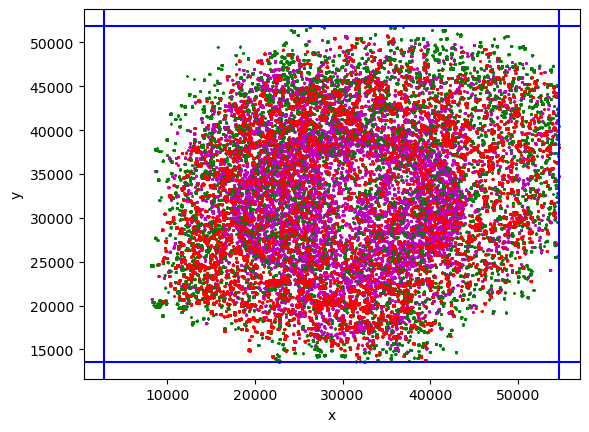

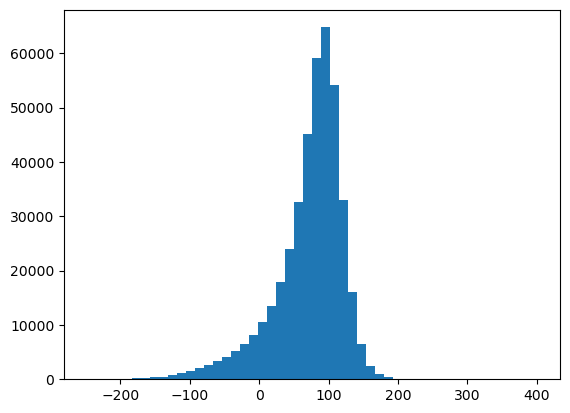

In [4]:
#____________________Load files__________________________________

File_number = 13*1

PixelSize = 108 # in nanometer
max_value = 200 # that is the cut of valule for the distance calcuations only neigbors closer as this value are taken into account


#############---BrefeldinA

file_path = [0] * File_number



###---BrefeldinA #############---#############---#############---#############---#############---
file_normal1 = r'H:\09.Adapter_PAINT\GolgiPlex\z.Drugs\BrefeldinA\231111_BrefeldinA\231111'
drug= 'BrefeldinA'
date='231111'



file_path[0] = file_normal1   +  r'_r1_GM130.hdf5'
file_path[1] = file_normal1   +  r'_r2_Giantin.hdf5'
file_path[2] = file_normal1   +  r'_r3_Golgin97.hdf5'
file_path[3] = file_normal1   +  r'_r4_TGN46.hdf5'
file_path[4] = file_normal1   +  r'_r5_ERGIC53.hdf5'
file_path[5] = file_normal1   +  r'_r6_Grasp65.hdf5'
file_path[6] = file_normal1   +  r'_r7_Tango1.hdf5'
file_path[7] = file_normal1   +  r'_r8_p230.hdf5'
file_path[8] = file_normal1   +  r'_r9_COPI.hdf5'
file_path[9] = file_normal1   +  r'_r10_COPII.hdf5'
file_path[10] = file_normal1  +  r'_r11_Lamin.hdf5'
file_path[11] = file_normal1  +  r'_r12_GRASP55.hdf5'
file_path[12] = file_normal1  +  r'_r13_ManII.hdf5'




#____________________Define some variables__________________________________


file = [0] * File_number
points = [0]*File_number
targets_to = [0]*File_number
columns_sort = [0]*File_number

#____________________Define the names of the target molecules____________________________


    
## This is the order files are loaded pay attention to the order of the path
targets = ['GM130','Giantin','Golgin97','TGN46','ERGIC53','GRASP65','Tango1','p230','COPI','COPII','Lamin','GRASP55','ManII']

targets_to  = ['GM130','Giantin','Golgin97','TGN46','ERGIC53','GRASP65','Tango1','p230','COPI','COPII','Lamin','GRASP55','ManII']

#____________________________________________________________________________________________________    


row_sort = ['GM130','GRASP65','GRASP55','ManII','p230','Golgin97','Giantin','TGN46','COPI','ERGIC53','COPII','Tango1','Lamin']

columns_sort = ['GM130','GRASP65','GRASP55','ManII','p230','Golgin97','Giantin','TGN46','COPI','ERGIC53','COPII','Tango1','Lamin']
    
    
#____________________Define cooradiate points for the kd-tree and filter____________________________


for i in range(File_number):
    file[i] = pd.read_hdf(file_path[i], key='locs')
    points[i] = pd.DataFrame()
    points[i]['x'] = file[i]['x']*PixelSize
    points[i]['y'] = file[i]['y']*PixelSize
    points[i]['z'] = file[i]['z']
    



##############--No Crop--##############

x_up =  points[i]['x'].max()
x_low = points[i]['x'].min()

y_up  = points[i]['y'].max()
y_low = points[i]['y'].min()

z_up  = points[i]['z'].max()
z_low = points[i]['z'].min()

##############--Paper crop TOTAL--##############

# x_up = 42000 
# x_low = 30000

# y_up  = 41000
# y_low = 20000

# z_up  = 200
# z_low = -50



########################################################

f_points = [0] * File_number

for i in range(File_number):
    f_points[i] = points[i].loc[(points[i]['x']>x_low) & (points[i]['x']<x_up)&
                               (points[i]['y']>y_low) & (points[i]['y']<y_up)&
                               (points[i]['z']>z_low) & (points[i]['z']<z_up)]

#____________________Plot some stuff ____________________________
    
plt.scatter(f_points[0]['x'],f_points[0]['y'],s = 0.1,color='m')
plt.scatter(f_points[1]['x'],f_points[1]['y'],s = 0.1,color='g')
plt.scatter(f_points[6]['x'],f_points[6]['y'],s = 0.1,color='r')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x = x_low, color = 'b')
plt.axvline(x = x_up, color = 'b')
plt.axhline(y = y_low, color = 'b',)
plt.axhline(y = y_up, color = 'b',)
plt.show()

plt.hist(f_points[0]['z'],bins=50)
plt.show()

In [5]:

#____________________Calculate the kd-tree ____________________________
tree = [0]*File_number
pre_dist_target_to = [[0]*File_number for _ in range(File_number)]
dist_target_to = [[0]*File_number for _ in range(File_number)]
dist_data = pd.DataFrame()

#____________________Calculate the distance matrix ____________________________
for i in range(File_number):
    tree[i] = scipy.spatial.cKDTree(f_points[i])  # Use group_idx here

for i in range(File_number):
    for j in range(File_number):
        pre_dist_target_to[i][j], _ = tree[i].query(f_points[j], k=1)  # Use group_idx here too
        dist_target_to[i][j] = pre_dist_target_to[i][j][(pre_dist_target_to[i][j]<max_value)]
        dist_data.loc[i, j] = np.median(np.array(dist_target_to[i][j]))

#____________________Label the axis of the distance matrix ____________________________

dist_data.columns = targets_to
dist_data.index = targets
groups_sep[1] = dist_data  

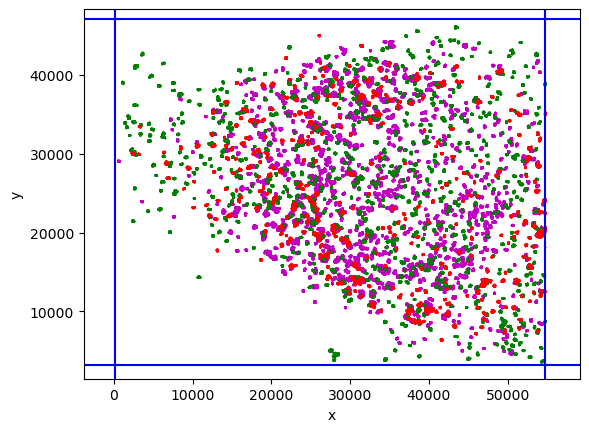

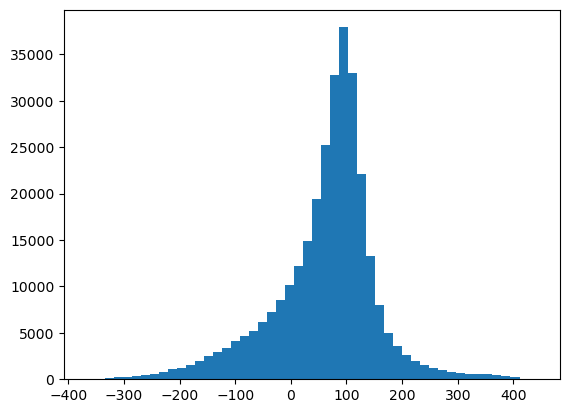

In [6]:
#____________________Load files__________________________________

File_number = 13*1


PixelSize = 108 # in nanometer
max_value = 200 # that is the cut of valule for the distance calcuations only neigbors closer as this value are taken into account


#############---BrefeldinA

file_path = [0] * File_number



###---BrefeldinA #############---#############---#############---#############---#############---
file_normal1 = r'H:\09.Adapter_PAINT\GolgiPlex\z.Drugs\BrefeldinA\231117_BrefeldinA\231117'
drug= 'BrefeldinA'
date='231117'



file_path[0] = file_normal1   +  r'_r1_GM130.hdf5'
file_path[1] = file_normal1   +  r'_r2_Giantin.hdf5'
file_path[2] = file_normal1   +  r'_r3_Golgin97.hdf5'
file_path[3] = file_normal1   +  r'_r4_TGN46.hdf5'
file_path[4] = file_normal1   +  r'_r5_ERGIC53.hdf5'
file_path[5] = file_normal1   +  r'_r6_Grasp65.hdf5'
file_path[6] = file_normal1   +  r'_r7_Tango1.hdf5'
file_path[7] = file_normal1   +  r'_r8_p230.hdf5'
file_path[8] = file_normal1   +  r'_r9_COPI.hdf5'
file_path[9] = file_normal1   +  r'_r10_COPII.hdf5'
file_path[10] = file_normal1  +  r'_r11_Lamin.hdf5'
file_path[11] = file_normal1  +  r'_r12_GRASP55.hdf5'
file_path[12] = file_normal1  +  r'_r13_ManII.hdf5'





#____________________Define some variables__________________________________


file = [0] * File_number
points = [0]*File_number
targets_to = [0]*File_number
columns_sort = [0]*File_number

#____________________Define the names of the target molecules____________________________


    
## This is the order files are loaded pay attention to the order of the path
targets = ['GM130','Giantin','Golgin97','TGN46','ERGIC53','GRASP65','Tango1','p230','COPI','COPII','Lamin','GRASP55','ManII']

targets_to  = ['GM130','Giantin','Golgin97','TGN46','ERGIC53','GRASP65','Tango1','p230','COPI','COPII','Lamin','GRASP55','ManII']

#____________________________________________________________________________________________________    


row_sort = ['GM130','GRASP65','GRASP55','ManII','p230','Golgin97','Giantin','TGN46','COPI','ERGIC53','COPII','Tango1','Lamin']

columns_sort = ['GM130','GRASP65','GRASP55','ManII','p230','Golgin97','Giantin','TGN46','COPI','ERGIC53','COPII','Tango1','Lamin']
    
    
#____________________Define cooradiate points for the kd-tree and filter____________________________


for i in range(File_number):
    file[i] = pd.read_hdf(file_path[i], key='locs')
    points[i] = pd.DataFrame()
    points[i]['x'] = file[i]['x']*PixelSize
    points[i]['y'] = file[i]['y']*PixelSize
    points[i]['z'] = file[i]['z']
    



##############--No Crop--##############

x_up =  points[i]['x'].max()
x_low = points[i]['x'].min()

y_up  = points[i]['y'].max()
y_low = points[i]['y'].min()

z_up  = points[i]['z'].max()
z_low = points[i]['z'].min()

##############--Paper crop TOTAL--##############

# x_up = 42000 
# x_low = 30000

# y_up  = 41000
# y_low = 20000

# z_up  = 200
# z_low = -50



########################################################

f_points = [0] * File_number

for i in range(File_number):
    f_points[i] = points[i].loc[(points[i]['x']>x_low) & (points[i]['x']<x_up)&
                               (points[i]['y']>y_low) & (points[i]['y']<y_up)&
                               (points[i]['z']>z_low) & (points[i]['z']<z_up)]

#____________________Plot some stuff ____________________________
    
plt.scatter(f_points[0]['x'],f_points[0]['y'],s = 0.1,color='m')
plt.scatter(f_points[1]['x'],f_points[1]['y'],s = 0.1,color='g')
plt.scatter(f_points[6]['x'],f_points[6]['y'],s = 0.1,color='r')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x = x_low, color = 'b')
plt.axvline(x = x_up, color = 'b')
plt.axhline(y = y_low, color = 'b',)
plt.axhline(y = y_up, color = 'b',)
plt.show()

plt.hist(f_points[0]['z'],bins=50)
plt.show()

In [7]:
#____________________Calculate the kd-tree ____________________________
tree = [0]*File_number
pre_dist_target_to = [[0]*File_number for _ in range(File_number)]
dist_target_to = [[0]*File_number for _ in range(File_number)]
dist_data = pd.DataFrame()

#____________________Calculate the distance matrix ____________________________
for i in range(File_number):
    tree[i] = scipy.spatial.cKDTree(f_points[i])  # Use group_idx here

for i in range(File_number):
    for j in range(File_number):
        pre_dist_target_to[i][j], _ = tree[i].query(f_points[j], k=1)  # Use group_idx here too
        dist_target_to[i][j] = pre_dist_target_to[i][j][(pre_dist_target_to[i][j]<max_value)]
        dist_data.loc[i, j] = np.median(np.array(dist_target_to[i][j]))

#____________________Label the axis of the distance matrix ____________________________

dist_data.columns = targets_to
dist_data.index = targets
groups_sep[2] = dist_data  

In [8]:
result = pd.concat(groups_sep, axis=0).groupby(level=0).median()

#result = groups_sep[0]

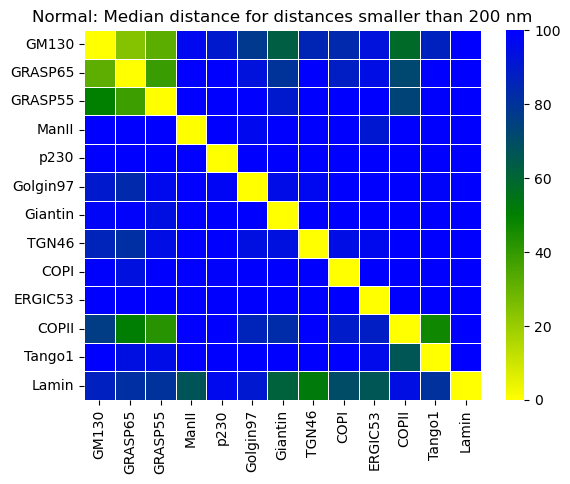

In [11]:
#____________________Sort columns and rows ____________________________

dist_data_sorted = result.reindex(index=list(row_sort), columns=columns_sort)

dist_data_sorted_swap = dist_data_sorted

#dist_data_sorted_swap = dist_data_sorted.swapaxes("index", "columns", copy=True)

#____________________Plot the heatmap ____________________________


cmap_custom = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","green","blue"])

sns.heatmap(dist_data_sorted_swap,vmin=None, vmax=100, cmap=cmap_custom,annot=False,linewidth=0.5)  #rocket_r   YIGnBu
plt.title('Normal: Median distance for distances smaller than ' + str(max_value) + ' nm' )
plt.savefig(r"BrefeldinAGolgi.pdf",dpi=600, bbox_inches='tight')
plt.show()